# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [ ]:
df = pd.read_csv('/content/SMILES_Big_Data_Set.csv')

In [ ]:
df.head()

,SMILES,pIC50,mol,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,<rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>,25,4.1591
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>,36,3.6743
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>,23,1.5361
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>,22,0.9510
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>,21,3.2130


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SMILES     16087 non-null  object 
 1   pIC50      15037 non-null  float64
 2   mol        16087 non-null  object 
 3   num_atoms  16087 non-null  int64  
 4   logP       16087 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 628.5+ KB


In [ ]:
df.describe()

,pIC50,num_atoms,logP
count,15037.000000,16087.000000,16087.000000
mean,0.998739,18.749984,2.256600
std,2.479588,8.428888,1.609861
min,0.000000,3.000000,-5.395600
25%,0.000000,13.000000,1.214900
50%,0.010000,17.000000,2.163200
75%,0.130000,23.000000,3.232440
max,10.970000,85.000000,15.879200


# EDA


In [ ]:
df.corr(numeric_only=True)

,pIC50,num_atoms,logP
pIC50,1.000000,0.514585,0.171863
num_atoms,0.514585,1.000000,0.374893
logP,0.171863,0.374893,1.000000


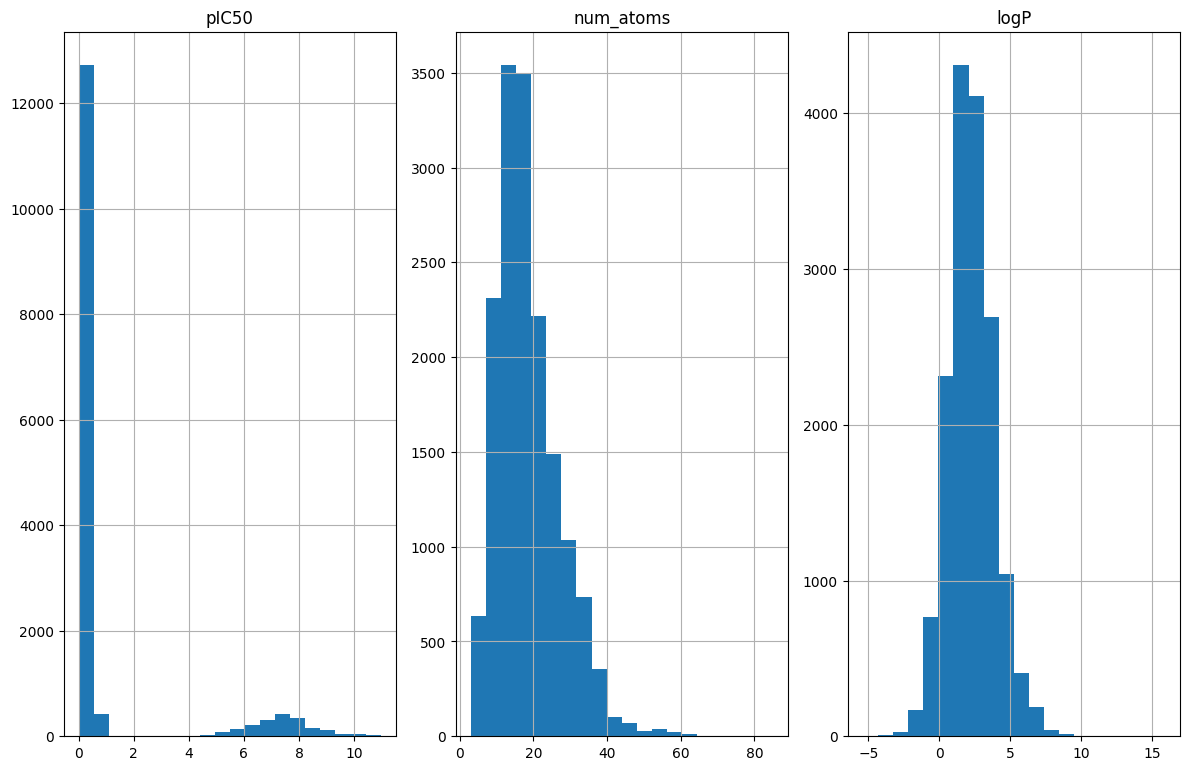

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
plots_per_figure = 6 # 2 rows * 3 columns
num_figures = (num_cols + plots_per_figure - 1) // plots_per_figure # ceiling division

for fig_idx in range(num_figures):
    plt.figure(figsize=(12, 15)) # Create a new figure for each set of plots
    start_index = fig_idx * plots_per_figure
    end_index = min((fig_idx + 1) * plots_per_figure, num_cols)

    for i, col_idx in enumerate(range(start_index, end_index)):
        col = numerical_cols[col_idx]
        plt.subplot(2, 3, i + 1) # i + 1 because subplot index is 1-based
        df[col].hist(bins=20)
        plt.title(col)
    plt.tight_layout()
    plt.show()

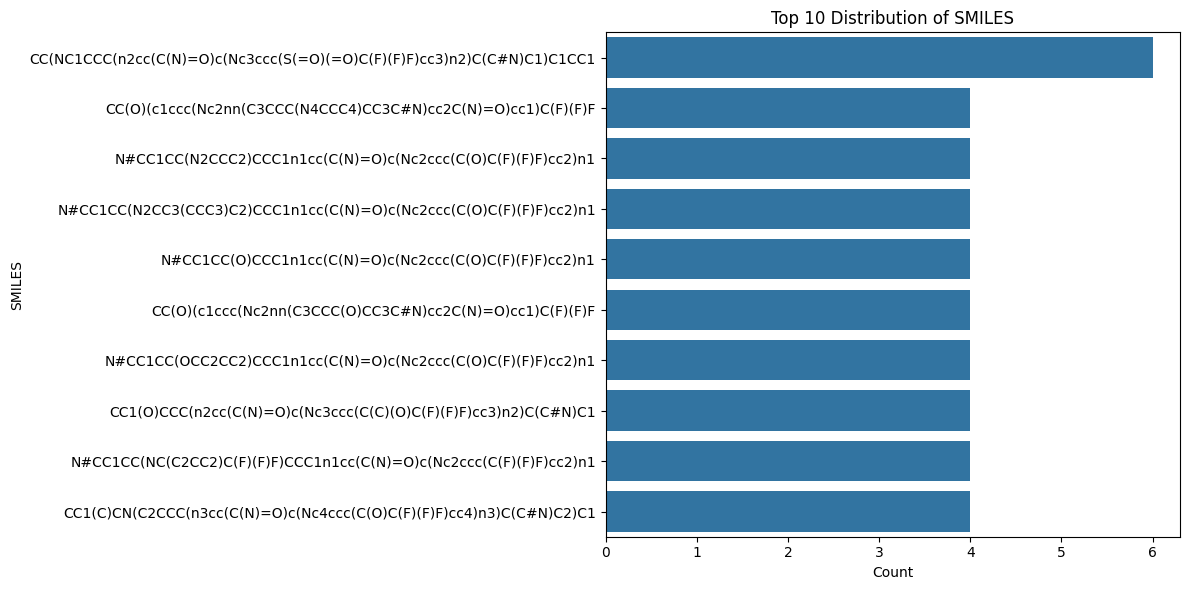

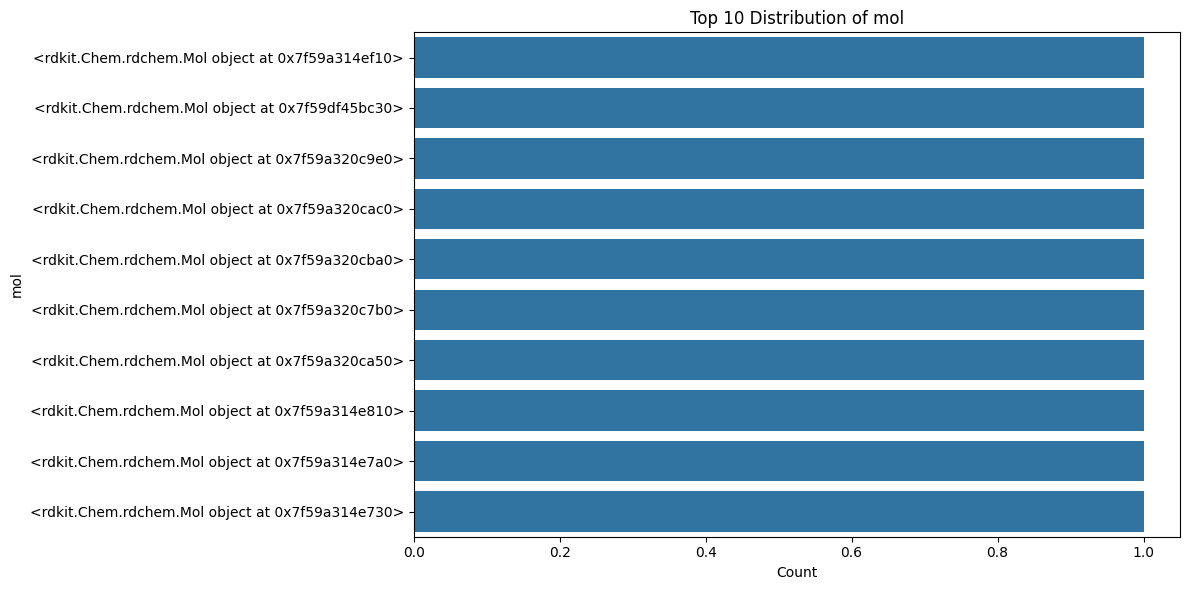

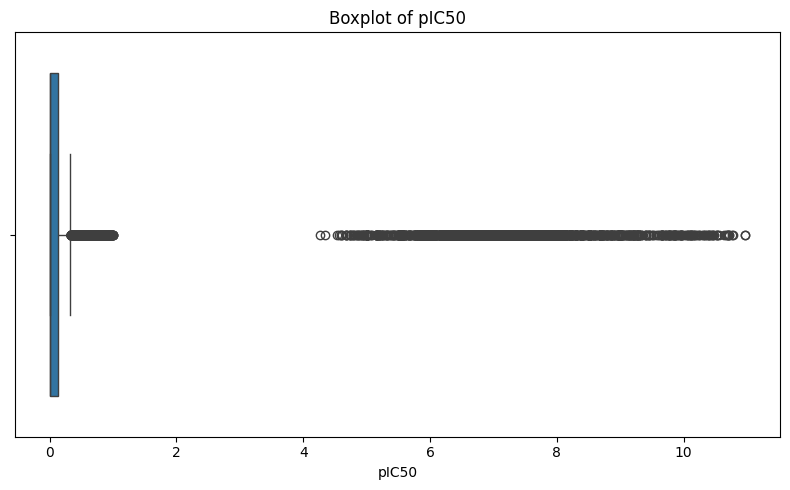

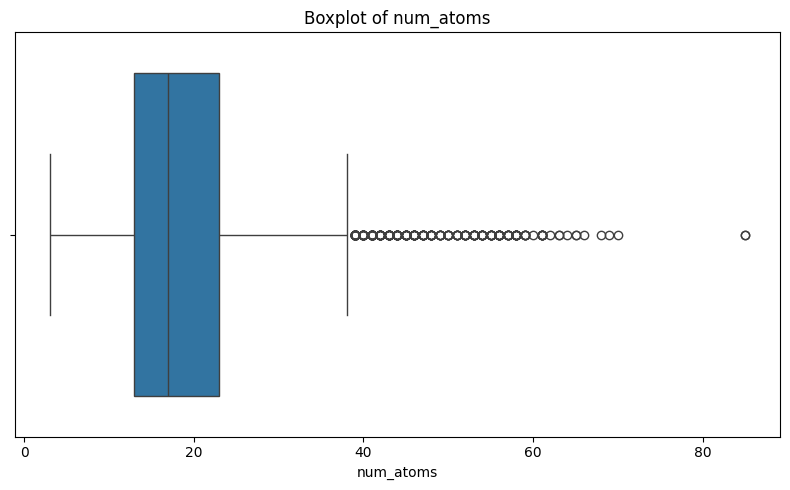

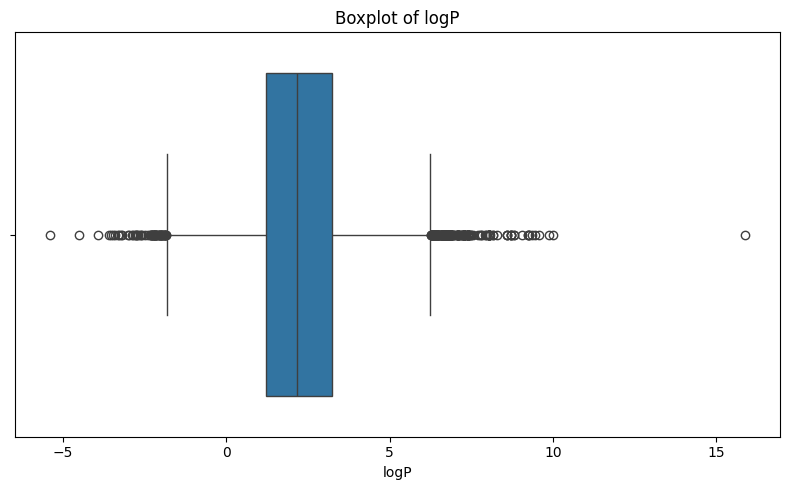

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols :
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
    plt.title(f'Top 10 Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    # Skip columns that are entirely NaN, as boxplot cannot be generated for them
    if df[col].isnull().all():
        print(f"Skipping boxplot for '{col}' as it contains only NaN values.")
        continue
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()